<a href="https://colab.research.google.com/github/cuongcodeF4/Artificial-Intelligence/blob/main/KT_giuaki/Anh_lop_20146.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils.image_utils import img_to_array 
from keras.utils import load_img 
from numpy.lib.npyio import load
import numpy as np

In [42]:
folder = '/content/drive/MyDrive/Colab Notebooks/Anh_lop_201461/Image/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('Bang'):
    output = 1.0   
  if file.startswith('Binh_A'):
    output = 2.0    
  if file.startswith('Binh_B'):
    output =  3.0   
  if file.startswith('Chi'):
    output =   4.0   
  if file.startswith('Chuong'):
    output =   5.0   
  if file.startswith('Cuong'):
    output =   6.0  
  if file.startswith('Dan'):
    output =   7.0     
  if file.startswith('Dang'):
    output =   8.0     
  if file.startswith('Duy'):
    output =   9.0   
  if file.startswith('Hieu'):
    output =   10.0  
  if file.startswith('Hoan'):
    output =   11.0   
  if file.startswith('Huy_A'):
    output =   12.0   
  if file.startswith('Huy_B'):
    output =   13.0   
  if file.startswith('Khanh'):
    output =   14.0  
  if file.startswith('Loc'):
    output =   15.0   
  if file.startswith('Nam'):
    output =   16.0  
  if file.startswith('Nhu'):
    output =   17.0  
  if file.startswith('Phi'):
    output =   18.0   
  if file.startswith('Phong'):
    output =   19.0   
  if file.startswith('Quang'):
    output =   20.0  
  if file.startswith('Thang'):
    output =   21.0   
  if file.startswith('Tri_A'):
    output =   22.0   
  if file.startswith('Tri_B'):
    output =   23.0   
  if file.startswith('Tu'):
    output =   24.0   
  if file.startswith('Tuan'):
    output =   25.0    
  if file.startswith('Tung'):
    output =   26.0   
  if file.startswith('Viet'):
    output =   27.0   
  if file.startswith('Vinh'):
    output =   28.0      
  photo = load_img (folder+file, target_size= (32,32))
  photo = img_to_array (photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
save('/content/drive/MyDrive/Colab Notebooks/Anh_lop_201461/Anh_201461_photo.npy', photos)
save('/content/drive/MyDrive/Colab Notebooks/Anh_lop_201461/Anh_201461_label.npy', labels)

In [43]:
photo = np.load('/content/drive/MyDrive/Colab Notebooks/Anh_lop_201461/Anh_201461_photo.npy')
label = np.load('/content/drive/MyDrive/Colab Notebooks/Anh_lop_201461/Anh_201461_label.npy')

In [44]:
split_sample = int(0.1*len(photo))
(x_train,y_train) = photo[split_sample:],label[split_sample:]
(x_test,y_test)= photo[:split_sample],label[:split_sample]

In [45]:
x_train.shape

(1607, 32, 32, 3)

In [46]:
x_test.shape

(178, 32, 32, 3)

In [47]:
x_train = x_train.reshape(1607,32,32,3)
x_test = x_test.reshape(178,32,32,3)
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [48]:
# chuyển đổi các nhãn lớp của dữ liệu huấn luyện và kiểm tra thành các vectơ one-hot encoding.
from keras.utils import to_categorical
y_train = to_categorical(y_train,29)
y_test  = to_categorical(y_test,29)

In [49]:
from keras.models import Sequential , Model
from keras.layers import Dense , Flatten, Dropout, Conv2D, MaxPooling2D ,Normalization,Input
from keras.optimizers import Adam 

In [50]:
batch_size = 100  # số lượng học
epochs = 40      #số lần học
classes = 29

In [51]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation ='linear',input_shape= (32,32,3),padding= 'same'))    # 32:số lần tích chập, (3,3): kích thước bộ lọc

from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha= 0.1))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64,(3,3), activation= 'linear', padding= 'same'))
model.add(LeakyReLU(alpha= 0.1))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(128,(3,3), activation= 'linear', padding= 'same'))
model.add(LeakyReLU(alpha= 0.1))
model.add(MaxPooling2D((2,2), padding= 'same'))

from keras.backend import categorical_crossentropy
from keras.losses import categorical_crossentropy
model.add(Flatten())  #Tín hiệu vào là tấm ảnh 
model.add(Dense(2048, activation= 'linear'))
model.add(LeakyReLU(alpha= 0.1))
model.add(Dense(1024, activation= 'linear'))
model.add(LeakyReLU(alpha= 0.1))
model.add(Dense(128,activation='linear'))   #Đi qua 128 lớp
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [52]:
model.compile(loss= categorical_crossentropy,optimizer= Adam(),metrics=['accuracy'])
train = model.fit(x_train,y_train,batch_size= batch_size,epochs=epochs,verbose =1)      # verbose=1,Hiển thị giá trị train, chỉ xuất hiện 1 lần rồi biến mất

Epoch 1/40
17/17 [==============================] - 1s 11ms/step - loss: 2.8043 - accuracy: 0.2172
Epoch 2/40
17/17 [==============================] - 0s 10ms/step - loss: 0.8424 - accuracy: 0.7474
Epoch 3/40
17/17 [==============================] - 0s 9ms/step - loss: 0.1820 - accuracy: 0.9502
Epoch 4/40
17/17 [==============================] - 0s 9ms/step - loss: 0.1582 - accuracy: 0.9484
Epoch 5/40
17/17 [==============================] - 0s 8ms/step - loss: 0.0508 - accuracy: 0.9863
Epoch 6/40
17/17 [==============================] - 0s 9ms/step - loss: 0.0271 - accuracy: 0.9919
Epoch 7/40
17/17 [==============================] - 0s 8ms/step - loss: 0.0304 - accuracy: 0.9907
Epoch 8/40
17/17 [==============================] - 0s 9ms/step - loss: 0.0305 - accuracy: 0.9888
Epoch 9/40
17/17 [==============================] - 0s 8ms/step - loss: 0.1045 - accuracy: 0.9782
Epoch 10/40
17/17 [==============================] - 0s 8ms/step - loss: 0.0291 - accuracy: 0.9894
Epoch 11/40
17/17

In [53]:
model.save('/content/drive/MyDrive/Colab Notebooks/Anh_lop_201461/model_Anh_lop_20146.h5')

6/6 [==============================] - 0s 20ms/step - loss: 26.4857 - accuracy: 0.2697
Test loss: 26.48566436767578
Test accuracy; 0.26966291666030884


Text(0.5, 1.0, 'Training & Test Accuracy')

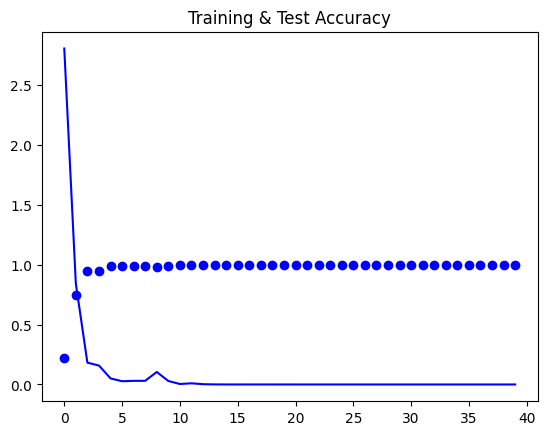

In [54]:
import matplotlib.pyplot as plt
eval = model.evaluate(x_test,y_test,verbose=1)
print('Test loss:', eval[0])
print('Test accuracy;',eval[1])
accuracy = train.history['accuracy']
val_accuracy = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label='Training Accuracy')
plt.plot(epochs,val_accuracy,'b',label= 'Test Accuracy')
plt.title('Training & Test Accuracy')

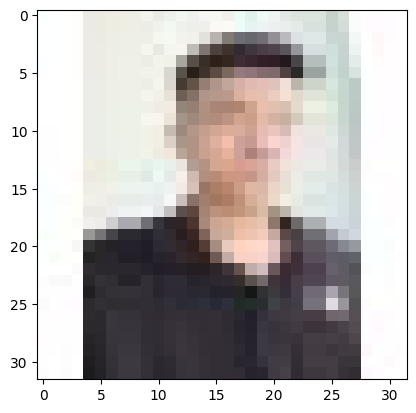

1/1 [==============================] - 0s 34ms/step
[21]
Nguyễn Phi Thắng


In [59]:
import matplotlib.pyplot as plt
from keras.utils.image_utils import img_to_array 
from keras.utils import load_img 
import numpy as np
img = load_img('/content/drive/MyDrive/Colab Notebooks/Anh_lop_201461/Image/Thang (5).jpg',target_size=(32,32))
plt.imshow(img)
plt.show()
img= img_to_array(img)
img =img.reshape(1,32,32,3)
img = img.astype('float32')
img = img /255
Ten=np.argmax(model.predict(img),axis=-1)
print(Ten)
ten = ['Huỳnh Hữu Bằng','Nguyễn Đức Bình','Vũ Đức Bình','Hữu Chí','Nguyễn Bảo Chương',
       'Thái Việt Cường','Huỳnh Quốc Dân','Nguyễn Hải Đăng','Trần Khánh Duy',
       'Đỗ Trọng Hiếu','Diệp Khải Hoàn','Huy A','Huy B','Hồ Đình Khanh','Quảng Trọng Tấn Lộc',
       'Đoàn Thanh Nam','Đình Như','Cao Tần Phi','Phong','Quang','Nguyễn Phi Thắng','Tri_A',
       'Tri_B','Hồ Đăng Tú','Võ Mình Tuấn','Tùng','Lê Sĩ Việt','Vinh']
for i in range(1,29):
  if (Ten == i):
    print(ten[i-1])

